### Collect Reddit Data - ANLY 590 Project
#### November 13, 2018

***

#### Prep

In [1]:
# set working directory
import os
import sys
import json
path = '/Users/kgedney/Documents/georgetown/anly590/author-id-project'
os.chdir(path)

In [23]:
# add API info
client_id     = 'my client id'
client_secret = 'my client secret'
user_agent    = 'deeplearning'
username      = 'my user name'
password      = ''

In [2]:
credentials = json.load(open('credentials.json'))

In [3]:
# import packages
import praw
import pandas as pd
import datetime as dt
from tqdm import tqdm

In [11]:
# set reddit credentials
reddit = praw.Reddit(client_id     = credentials['client_id'],
                     client_secret = credentials['client_secret'],
                     user_agent    = credentials['user_agent'],
                     username      = credentials['username'],
                     password      = credentials['password'])

***

####  Scrape Comments

In [29]:
# import usernames
midterms = pd.read_csv('Midterms.csv')
midterms.head()
midterms = midterms.iloc[1:]
print(len(midterms['author'].unique()))

421


In [30]:
# intialize dictionary
usernames     = midterms['author'].unique()
comments_dict = {'author'  : [], 
                 'body'    : [],
                 'subreddit' : [],
                 'permalink' : []}

In [49]:
# run scrape
for username in tqdm(usernames):
    try:
        for comment in reddit.redditor(username).comments.new(limit=None):
            comments_dict['author'].append(username)
            comments_dict['body'].append(comment.body)
            comments_dict['subreddit'].append(str(comment.subreddit))
            comments_dict['permalink'].append(str(comment.permalink))
    except KeyboardInterrupt:
        raise
    except:
        print('error at %s' % username, file=sys.stderr) 
    


 16%|█▌        | 68/421 [15:05<1:03:01, 10.71s/it]error at nan

 23%|██▎       | 95/421 [20:13<54:36, 10.05s/it]  error at suprnva84

 72%|███████▏  | 303/421 [1:06:40<31:50, 16.19s/it]


100%|██████████| 421/421 [1:32:21<00:00, 16.08s/it]


In [53]:
# create df
df = pd.DataFrame(comments_dict)
df.head()

,author,body,subreddit,permalink
0,BlakeIsBlake,There’s nothing better than when Tina herself ...,AskNYC,/r/AskNYC/comments/9y63sc/favorite_diners/e9yy...
1,BlakeIsBlake,Acceptance rate and entrance rate are not the ...,USC,/r/USC/comments/9x090z/usc_admission_rate_drop...
2,BlakeIsBlake,I'm going to have to go with the opposite and ...,cscareerquestions,/r/cscareerquestions/comments/9x2gzh/wearing_o...
3,BlakeIsBlake,[Not exactly.](http://bfy.tw/KrVy),AskNYC,/r/AskNYC/comments/9wvss2/where_to_meet_others...
4,BlakeIsBlake,I just went through this process myself. What ...,AskNYC,/r/AskNYC/comments/9wb7y4/finding_a_therapistc...


In [54]:
# remove AutoModerator posts
df = df[df['author'] != 'AutoModerator'].reset_index(drop=True)
print(df.shape)
df.head()

(355427, 4)


,author,body,subreddit,permalink
0,BlakeIsBlake,There’s nothing better than when Tina herself ...,AskNYC,/r/AskNYC/comments/9y63sc/favorite_diners/e9yy...
1,BlakeIsBlake,Acceptance rate and entrance rate are not the ...,USC,/r/USC/comments/9x090z/usc_admission_rate_drop...
2,BlakeIsBlake,I'm going to have to go with the opposite and ...,cscareerquestions,/r/cscareerquestions/comments/9x2gzh/wearing_o...
3,BlakeIsBlake,[Not exactly.](http://bfy.tw/KrVy),AskNYC,/r/AskNYC/comments/9wvss2/where_to_meet_others...
4,BlakeIsBlake,I just went through this process myself. What ...,AskNYC,/r/AskNYC/comments/9wb7y4/finding_a_therapistc...


In [210]:
# save as csv
df.to_csv('raw_data-2.csv', index=False, encoding='utf-8')

***

#### Exploratory Analysis

In [84]:
# read in data
df = pd.read_csv('raw_data.csv')

In [55]:
# average of 838 posts per author
df.groupby('author').count().mean()

body         848.274463
subreddit    848.274463
permalink    848.274463
dtype: float64

In [56]:
# 419 unique authors
len(set(df['author']))

419

In [69]:
# create new columns for word count and character count
df['num_chars'] = df.body.apply(lambda x: len(x))
df['num_words'] = df.body.apply(lambda x: len(x.split(' ')))

In [70]:
# average words (just on a basic tokenization)
df['num_words'].mean()

43.46863631631812

In [71]:
# average characters
df['num_chars'].mean()

251.49956531158296

In [76]:
df.describe()

,num_chars,num_words
count,355427.000000,355427.000000
mean,251.499565,43.468636
std,394.754995,65.333025
min,0.000000,1.000000
25%,61.000000,11.000000
50%,134.000000,24.000000
75%,287.000000,50.000000
max,9999.000000,2048.000000


In [121]:
len(df.body[df.num_chars > 3000])

977

In [120]:
print(df.body[10722])

A black-friendly Republican Party would like a dead Republican party.  Right now the GOP is a coalition of white-identitarians, Evangelicals, and business leaders and a major schism separating any of the 3 would make it very difficult for the party to function.

Black-friendly policies would not also be the absolute worst possible initiative for the white identity social faction, it would alienate business leaders that preach reductions in welfare and taxes.  

At the moment, it is less true to say black Americans are *for* the Democrats than to say that they are actively *against* the Republicans, particularly the white identity faction of its base.  When polled, [only 1% of black Americans identified as Republican](http://www.apnorc.org/PDFs/AP-NORC%20Omnibus%20February%202018/February%202018%20Custom%20Poll%20Topline_FINAL.pdf), as opposed to 59% who identified as Democratic.  And yet, black Americans turnout consistently in the high 80s or even 90s percent rate for Democratic polit

In [109]:
df.iloc[347362]

author                                                metalski
body         N4IgbgpgTgzglgewHYDkCuBbARtEAuEANQAYA6AVlLIDYA...
subreddit                                         SpaceCompany
permalink    /r/SpaceCompany/comments/9ra66w/tier_4_machine...
num_chars                                                 9645
num_words                                                    1
Name: 347362, dtype: object

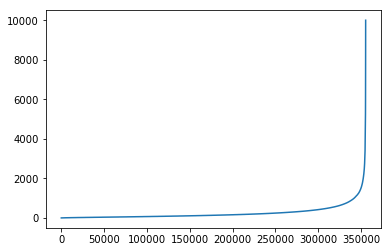

In [77]:
import matplotlib.pyplot as plt
plt.plot(sorted(list(df.num_chars)))
plt.show()

#### Filter Data

In [250]:
# 1. select posts that are over 60 characters
sel1 = df.num_chars > 60

In [251]:
# 2. select posts that are less than 1000 chars 
sel2 = df.num_chars < 1000

In [252]:
df_filtered = df[(sel1) & (sel2)].reset_index(drop=True)

In [253]:
# 3. select authors who have written over 500 posts
author_counts = pd.DataFrame(df_filtered['author'].value_counts())
authors = list(author_counts.index[author_counts['author'] > 500])
len(authors)

306

In [254]:
df_filtered = df_filtered[df_filtered['author'].isin(authors)]

In [255]:
df_filtered.shape

(222850, 6)

In [256]:
len(set(df_filtered['author']))

306

In [257]:
# randomly subset to 100 authors
import numpy as np
authors_random = np.random.choice(authors, 100, replace=False)

In [258]:
# final filter
df_filtered = df_filtered[df_filtered['author'].isin(authors_random)].reset_index(drop=True)

In [259]:
# save to file
df_filtered.to_csv('filtered_data.csv', index=False, encoding='utf-8')

In [260]:
len(set(df_filtered['author']))

100

In [265]:
# 1844 different subreddits!
len(set(df_filtered.subreddit))

1844

In [263]:
df_filtered.describe()

,num_chars,num_words
count,72662.000000,72662.000000
mean,253.352399,44.298822
std,195.280757,33.783876
min,61.000000,1.000000
25%,111.000000,20.000000
50%,185.000000,33.000000
75%,330.000000,58.000000
max,999.000000,202.000000


***

### Old Stuff

In [ ]:
subreddit = (reddit.subreddit('technology'))

In [ ]:
for submission in subreddit(limit=None):
    print(submission.title, submission.id)

In [74]:
# print comments
comments_dictionary = {}
i = 0

for comment in tqdm((reddit.subreddit('technology').comments(limit=None))):
    comments_dictionary[i] = (comment.body, comment.author, comment.author_fullname)
    i = i + 1
    #print(comment.body, comment.author, comment.author_fullname)

966it [00:12, 77.59it/s]


In [73]:
len(comments_dictionary)

967

In [66]:
# vars(comment)

## Tranform from comment level to aggregate level

In [6]:
import pandas as pd 
df = pd.read_csv('filtered_data.csv')

In [60]:
author_dict = {x: " ".join(y["body"].tolist()) for x,y in df.groupby("author")}

In [76]:
df_dict = pd.Series(author_dict).rename_axis(['authors']).reset_index(name='text')

In [83]:
df_dict

,authors,text
0,101ina45,"I guess that’s fair, why wasn’t this an issue ..."
1,7omdogs,Get outta here with your “thinking things thro...
2,AndyChrono,I think it will hit 2 billion. But in a pessim...
3,Arthur_Edens,"I think you had a weird autocorrect there, I'm..."
4,Banelingz,Brokeback Mountain and Moonlight are perfect e...
5,BiBiBicycle,"Ooh okay thanks lol, my hair is unfortunately ..."
6,BlackCatsAreMagic,A local friend of mine has a larger commercial...
7,Brutally-Honest-,Pudge never tested positive for steroids....\n...
8,BublyWater,Currents is kinda doing it. This ep sounds hea...
9,Buck_Sackhammer,"If I were going to have kids, which I'm not, I..."
